In [34]:
library(tidyverse)
library(ggpmisc)
Conc <- c(0, 2, 4, 6, 8, 10, 12, 14)   # [BSA], in micrograms / mL
Abs <- c(0.079, 0.156, 0.258, 0.338, 0.370, 0.403, 0.469, 0.503) # Absorbance
Abs_2 <- c(0.0802, 0.150, 0.237, 0.338, 0.351, 0.377, 0.462, 0.509)
df <- data.frame(conc = Conc, abs = Abs, abs_2 = Abs_2)
moyenne <- rowMeans(df[, c(2, 3)])
valeurs_initiales <- data.frame(concentration = Conc, absorbation_1 = Abs, absorbance_2 = Abs_2)
valeurs_initiales
valeurs_finales <- data.frame(concentration = df$conc, absorbance_moyenne = moyenne)
valeurs_finales

concentration,absorbation_1,absorbance_2
<dbl>,<dbl>,<dbl>
0,0.079,0.0802
2,0.156,0.1500
4,0.258,0.2370
6,0.338,0.3380
8,0.370,0.3510
10,0.403,0.3770
12,0.469,0.4620
14,0.503,0.5090


concentration,absorbance_moyenne
<dbl>,<dbl>
0,0.0796
2,0.1530
4,0.2475
6,0.3380
8,0.3605
10,0.3900
12,0.4655
14,0.5060


In [35]:
modele_lineaire <- lm(absorbance_moyenne ~ concentration,
  data = valeurs_finales
)

In [36]:
fitted <- coef(modele_lineaire)
int <- fitted[1]
slope <- fitted[2]

In [37]:
options(digits = 3)
a <- mean(0.659, 0.617)
b <- mean(0.518, 0.676)
c <- mean(0.530, 0.499)
d <- mean(0.382, 0.418)

e <- (c(a, b, c, d) - int) / slope
e

paste0("Concentration protein A: ", signif(e[1] / 2, digits = 3), " µg/mL")
paste0("Concentration protein B: ", signif(e[2] / 2, digits = 3), " µg/mL")

[1] 18.48 13.74 14.14  9.17

[1] "Concentration protein A: 9.24 µg/mL"

[1] "Concentration protein B: 6.87 µg/mL"

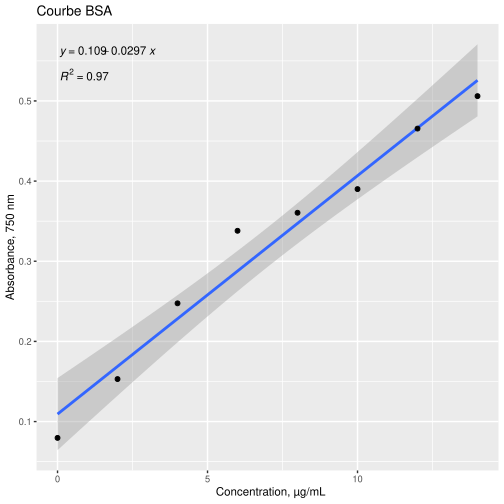

In [38]:
p <- ggplot(data = valeurs_finales, aes(x = concentration, y = absorbance_moyenne)) +
  stat_poly_line() +
  stat_poly_eq(use_label(c("eq"))) +
  stat_poly_eq(label.y = 0.9) +
  geom_point() +
  labs(x = "Concentration, µg/mL", y = "Absorbance, 750 nm") +
  ggtitle("Courbe BSA") +
  theme_replace()
p

La formule pour déterminer la concentration en protéines de l'échantillon, en se basant sur la courbe d'étalonnage BSA (Albumine Sérum Bovin), est la suivante :
$$
c = \frac{{\text{Abs} - I}}{{\epsilon}}
$$
où :
$C$ représente la concentration de protéines dans l'échantillon,
$Abs$ est l'absorbance,
$I$ est l'intercept,
$\epsilon$ est la pante.